# 01. Importing libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Importing data

In [ ]:
# Establish path
path = r'C:\Users\elena\Documents\02.2025 Instacart Basket Analysis'

In [7]:
# Import the big merged datafile
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_merge_4.8.pkl'))

# 03 Bar chart for order_day_of_week

<Axes: xlabel='orders_day_of_week'>

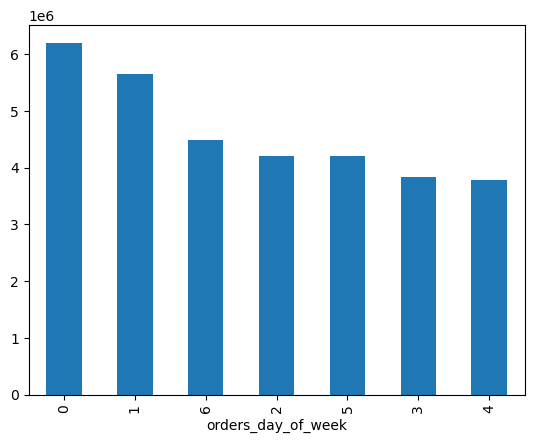

In [14]:
# Plotting order fequencies for different week days
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

The columns on the x-axis are automatically sorted by frequency. 

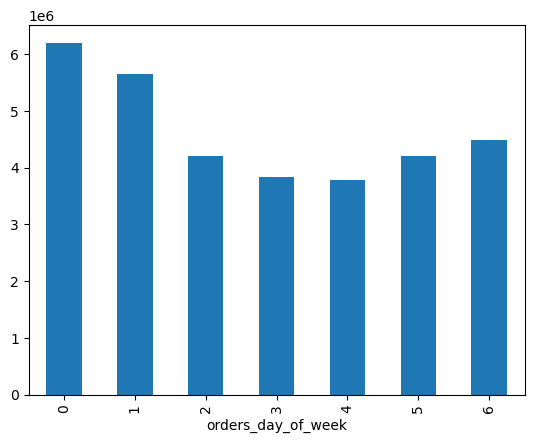

In [19]:
# Doing a bar chart with days of the week in their original order
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [21]:
# Printing frequencies with days of the week in their original order
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6203329
1    5659298
2    4213105
3    3839865
4    3783172
5    4205076
6    4495887
Name: count, dtype: int64

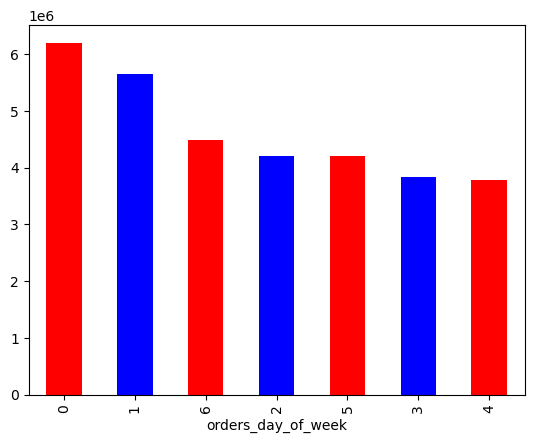

In [25]:
# Changing colour of the bar chart
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color = ['red', 'blue'] )

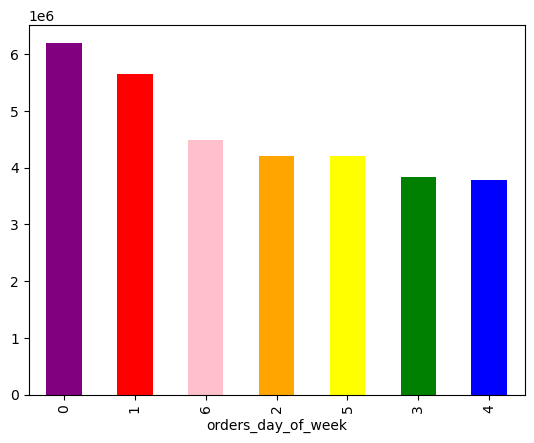

In [27]:
# Trying many different colours
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

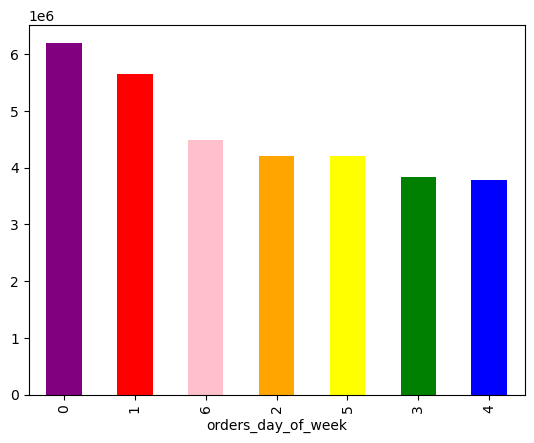

In [29]:
# Retrieving the saved visualization
bar.figure

In [33]:
# Exporting the bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# 04 Histogram for prices variable

<Axes: ylabel='Frequency'>

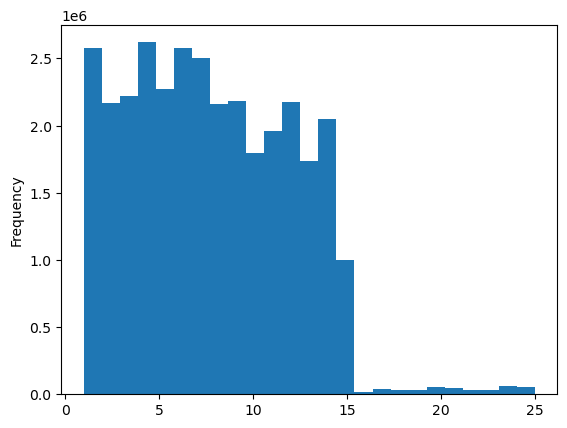

In [36]:
# Plotting historam for 'Prices' column
ords_prods_merge['prices'].plot.hist(bins = 25)

Since the outliers in the 'Prices' column have been removed during data clearning (exercise 4.5), the histogram looks fine. But need to increase the level of granularity. 

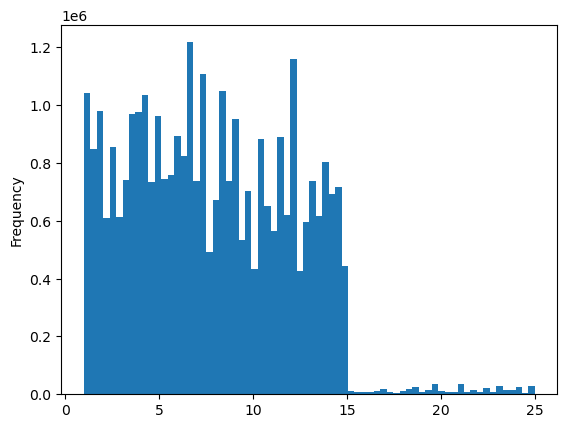

In [39]:
# Plotting histograms with more bins to look at more variation in price frequency
hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [41]:
# Exporting the histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

# 05 Scatterplot for prices variable

<Axes: xlabel='prices', ylabel='prices'>

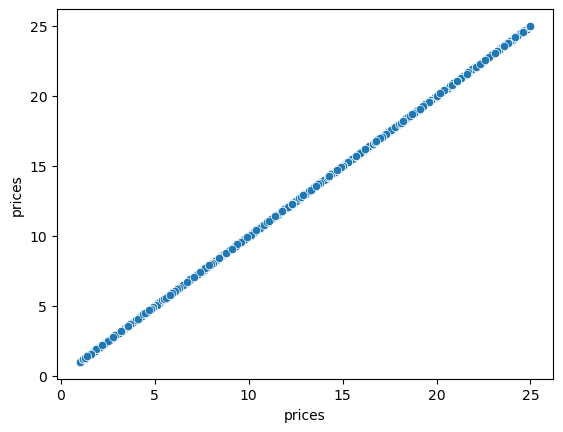

In [44]:
# Plotting the scatterplot with prices against prices inspect for outliers
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

# 06 Creating a sample from the database

In [66]:
# Getting a set of random numbers from library 
np.random.seed(4)
# Create a list holding True/False values to the test np.random.rand() <= 0.7  
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [68]:
# Check the generated list
dev

array([False,  True, False, ..., False,  True,  True])

In [70]:
# Store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]
# Store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [58]:
len(ords_prods_merge)

32399732

In [72]:
# Check that 'big' and 'small' dataframes together contain the same number of rows as the 'ords_prods_merge' dataframe
len(big)+len(small)

32399732

In [74]:
# Create a small dataframe with 30% of rows and onlu the '' and 'prices' columns included
df_2 = small[['orders_day_of_week','prices']]

In [64]:
df_2.shape

(9719609, 2)

# 07 Creating a line chart for prices and day of the week variables

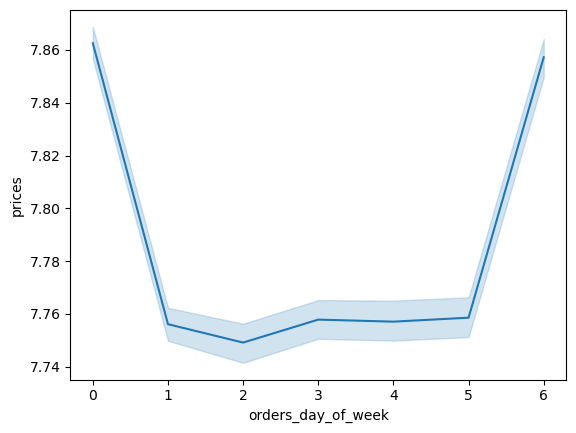

In [77]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [ ]:
# Exporting the line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders_dow_prices.png'))